#**Loan Approval Prediction:**

This project predicts whether a loan will be approved based on applicant details like income, credit history, employment, and loan amount.

The dataset is explored, cleaned, and balanced using SMOTE, followed by model building

In [1]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['Loan_Eligibility_Prediction_data.csv']), encoding='ISO-8859-1')

df.head(5)

Saving Loan_Eligibility_Prediction_data.csv to Loan_Eligibility_Prediction_data.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Check null values:

df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

##**Handling missing values:**

In [5]:

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])



# Recheck null values after imputation:

df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


##**Feature Engineering:**


In [6]:
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']


df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)


In [7]:
# Save cleaned data to new file

df.to_csv("Cleaned_Loan_Approval_Prediction.csv", index=False)

files.download('Cleaned_Loan_Approval_Prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**Data Exploration:**

In [8]:
# Sepearting categorical & numeric columns:

cat_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']
num_cols = ['LoanAmount', 'Loan_Amount_Term','Credit_History', 'TotalIncome',]

/tmp/ipython-input-3955684016.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


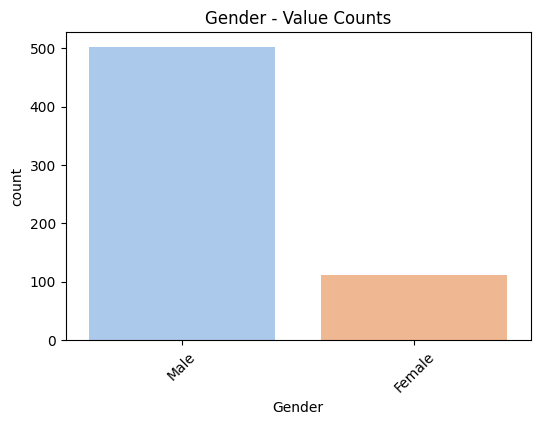

/tmp/ipython-input-3955684016.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


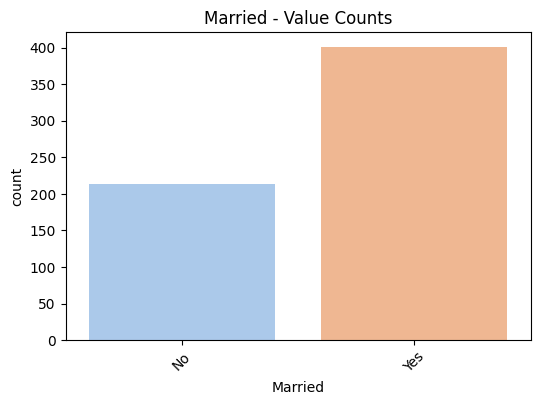

/tmp/ipython-input-3955684016.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


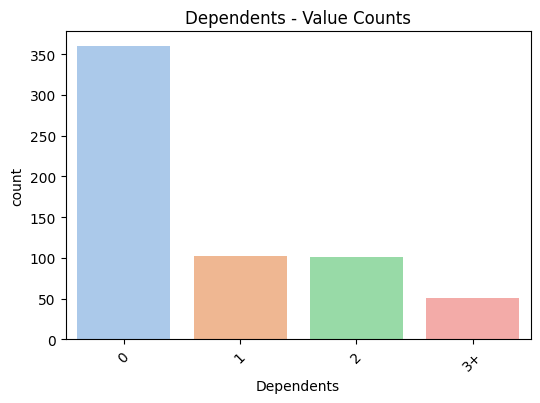

/tmp/ipython-input-3955684016.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


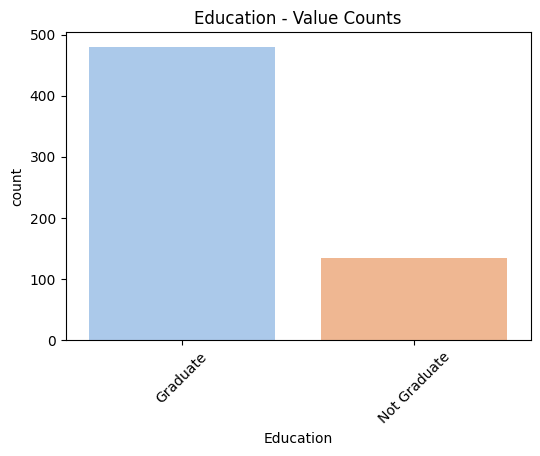

/tmp/ipython-input-3955684016.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


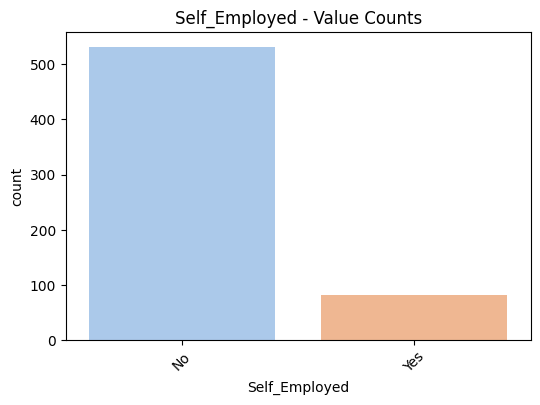

/tmp/ipython-input-3955684016.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


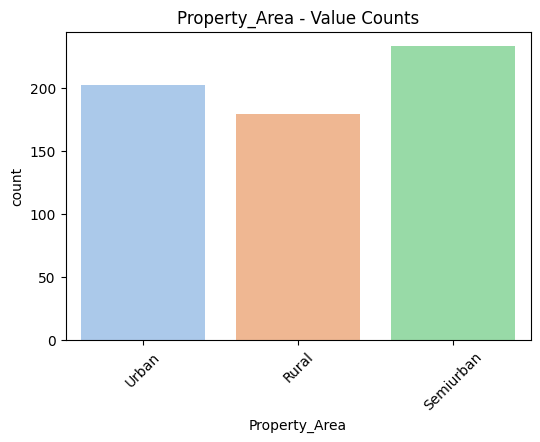

In [9]:
# Visualizing categorical columns:

import matplotlib.pyplot as plt
import seaborn as sns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'{col} - Value Counts')
    plt.xticks(rotation=45)
    plt.show()



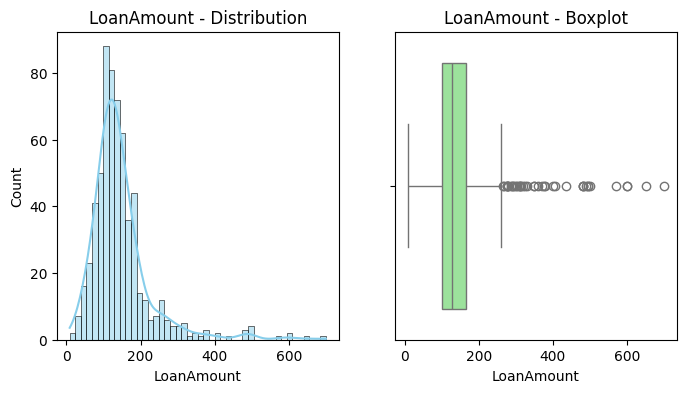

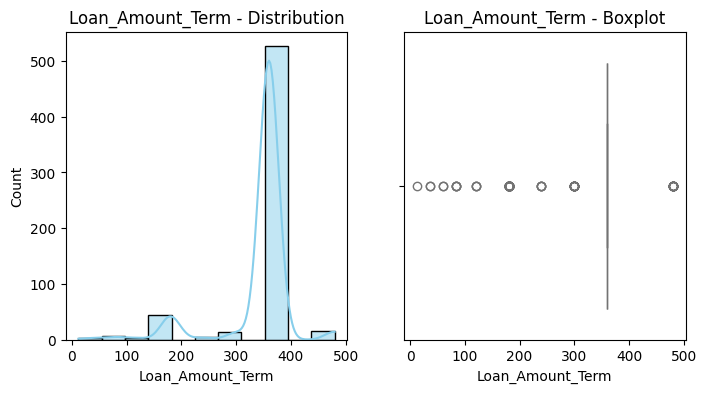

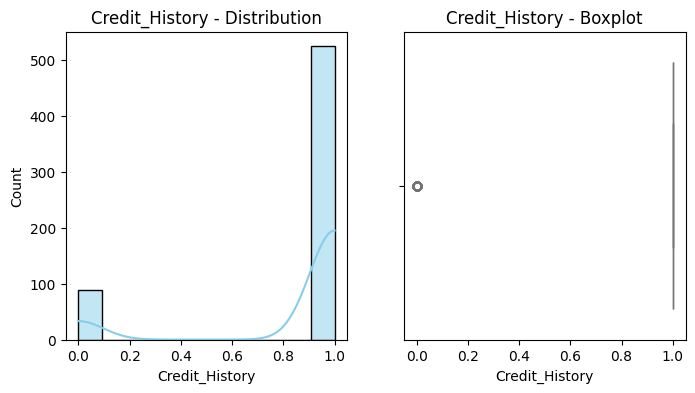

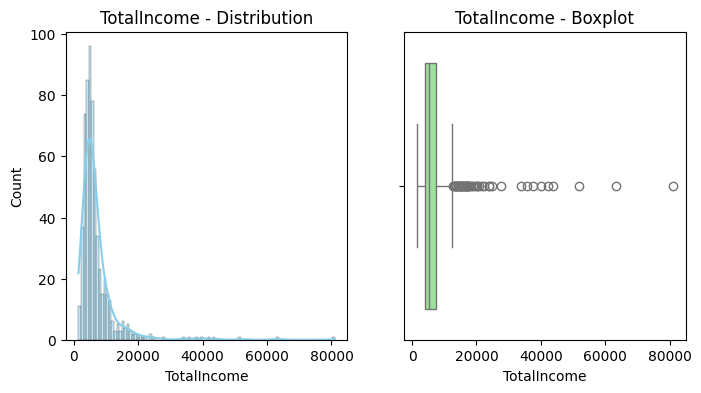

In [10]:
# Visualizing numerical columns:

for col in num_cols:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} - Distribution')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'{col} - Boxplot')

    plt.show()

##**Skewed Distribution Treatment:**
In previous section, it already shown that distribution for TotalIncome and LoanAmount is positively skewed.
We will use square root transformation to normalized the distribution.

In [11]:
# Square Root Transformation

df.LoanAmount = np.sqrt(df.LoanAmount)
df.TotalIncome = np.sqrt(df.TotalIncome)

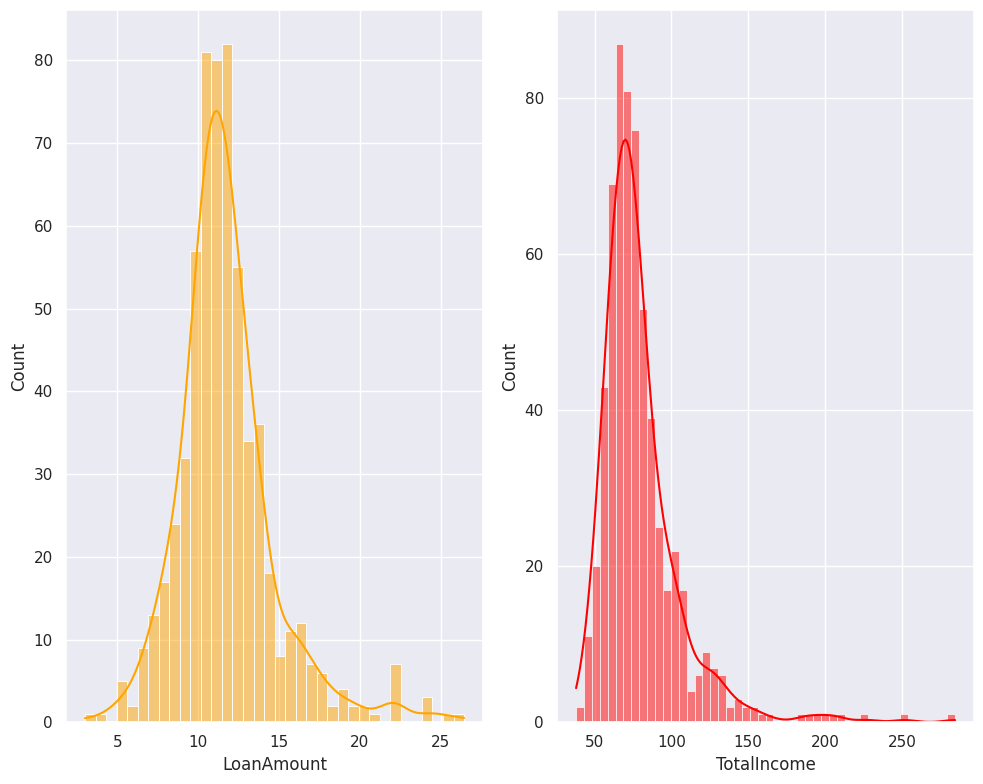

In [12]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1,2, figsize=(10, 8))

sns.histplot(data=df, x='LoanAmount', kde=True, ax=axs[0], color='orange')

sns.histplot(data=df, x='TotalIncome', kde=True, ax=axs[1], color='red')

plt.tight_layout()
plt.show()


##**Train Test Split:**

In [13]:
# Seperating dependent and independent variables:

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
print(X.columns)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'TotalIncome'],
      dtype='object')


In [14]:
# Train Test split:

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


##**Encoding categorical variables:**
Here, OneHot Encoder is used for encoding independent categorical variables and Label Encoder used for encoding target variable

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)



# OneHotEncoder independent categorical variables:

X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat  = ohe.transform(X_test[cat_cols])



#  Scale numeric variables:

scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num  = scaler.transform(X_test[num_cols])


# Combine new categorical and numerical columns:

X_train_final = np.hstack((X_train_num, X_train_cat))   #hstack for horizontal stack
X_test_final  = np.hstack((X_test_num, X_test_cat))

In [16]:
# Label Encoder for target variable:

le_y = LabelEncoder()

y_train = le_y.fit_transform(y_train)
y_test  = le_y.transform(y_test)

##**SMOTE Technique:**

In previous exploration, it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

/tmp/ipython-input-2776125319.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="coolwarm")


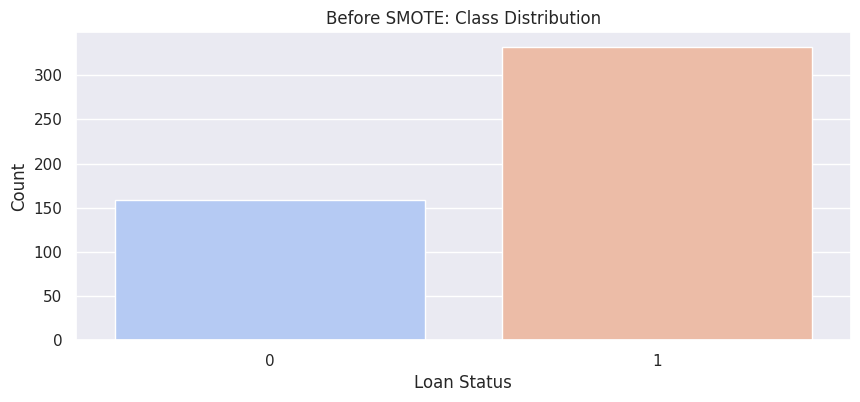

In [17]:
# Plot before SMOTE :


plt.figure(figsize=(10,4))
sns.countplot(x=y_train, palette="coolwarm")
plt.title("Before SMOTE: Class Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [18]:
# Apply SMOTE on training data:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)


# Combine new categorical and numerical columns:

X_train_final = np.hstack((X_train_num, X_train_cat))   #hstack for horizontal stack
X_test_final  = np.hstack((X_test_num, X_test_cat))
X_train_final, y_train = smote.fit_resample(X_train_final,y_train)




/tmp/ipython-input-357064738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="coolwarm")


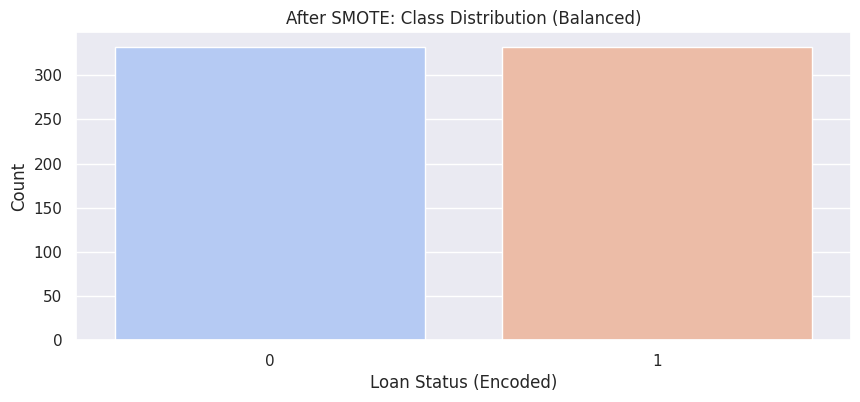

In [19]:
# Plot after SMOTE :

plt.figure(figsize=(10,4))
sns.countplot(x=y_train, palette="coolwarm")
plt.title("After SMOTE: Class Distribution (Balanced)")
plt.xlabel("Loan Status (Encoded)")
plt.ylabel("Count")
plt.show()

##**Logistic Regression:**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression:
log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train_final, y_train)

# Predictions:
y_pred_log = log_reg.predict(X_test_final)

# Evaluation:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7560975609756098

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.48      0.52        33
           1       0.82      0.86      0.84        90

    accuracy                           0.76       123
   macro avg       0.69      0.67      0.68       123
weighted avg       0.75      0.76      0.75       123



##**XG Boost:**

In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

xgb.fit(X_train_final, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test_final)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7073170731707317

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.52      0.49        33
           1       0.81      0.78      0.80        90

    accuracy                           0.71       123
   macro avg       0.64      0.65      0.64       123
weighted avg       0.72      0.71      0.71       123



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:47:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [22]:
print("Model Comparison")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_log):.4f}")

print(f"XGBoost:             {accuracy_score(y_test, y_pred_xgb):.4f}")


Model Comparison
Logistic Regression: 0.7561
XGBoost:             0.7073


##**Hyperparameter Tunning**:
Optimizing model performance by finding the best combination of parameters for the algorithm.

In [23]:
from sklearn.model_selection import GridSearchCV


xgb = XGBClassifier(random_state=0, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_final, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.1, 0.05], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [24]:
print("Best Parameters:", grid.best_params_)
print("\nBest CV Score:", grid.best_score_)

best_xgb = XGBClassifier(**grid.best_params_, random_state=0)
best_xgb.fit(X_train_final, y_train)

# Predictions:
y_pred_tuned = best_xgb.predict(X_test_final)

# Evaluation:
print("\nAccuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n",classification_report(y_test, y_pred_tuned))

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

Best CV Score: 0.7666422078186784

Accuracy: 0.7642276422764228

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.55      0.55        33
           1       0.84      0.84      0.84        90

    accuracy                           0.76       123
   macro avg       0.70      0.69      0.70       123
weighted avg       0.76      0.76      0.76       123



##**Feature Importance:**
Identifying which features contribute the most to the model’s predictions.

<Figure size 1000x600 with 0 Axes>

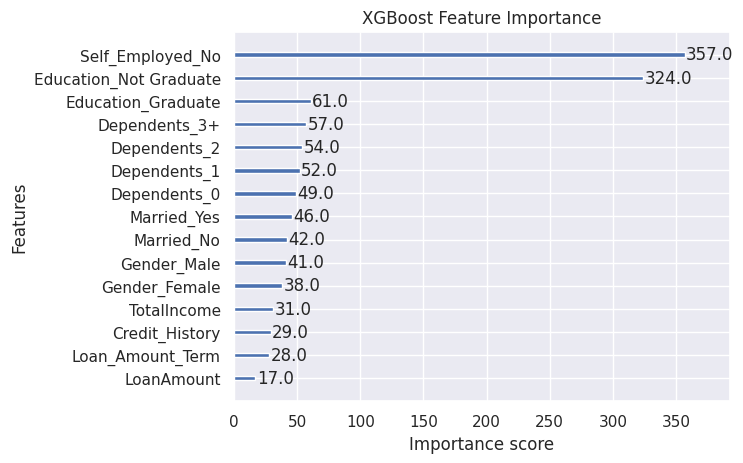

In [25]:
# XGBoost Feature Importance Visualization:

from xgboost import plot_importance
import matplotlib.pyplot as plt

#  Rebuild feature names (numeric + encoded categorical)

cat_feature_names = ohe.get_feature_names_out(input_features = cat_cols)
all_feature_names = np.concatenate([num_cols, cat_feature_names])


# Plot feature importance
plt.figure(figsize=(10,6))
plot_importance(best_xgb, max_num_features=15)
plt.yticks(np.arange(15), all_feature_names[:15])    # to get readable column names after encoding
plt.title("XGBoost Feature Importance")
plt.show()


In [26]:
# get importances from your existing model:
importances = best_xgb.feature_importances_

# sort indices by importance (high → low):
sorted_idx = np.argsort(importances)[::-1]

# choose top 15 featues:
N = 15
top_idx = sorted_idx[:N]

# for feature names:
top_feature_names = [all_feature_names[i] for i in top_idx]
print("Top features:", top_feature_names)

Top features: ['Credit_History', 'Property_Area_Semiurban', 'Dependents_2', 'Education_Graduate', 'Dependents_1', 'Self_Employed_No', 'Dependents_0', 'Married_No', 'Loan_Amount_Term', 'TotalIncome', 'LoanAmount', 'Dependents_3+', 'Property_Area_Rural', 'Property_Area_Urban', 'Gender_Female']


In [29]:
# Slice train/test to keep only those columns


X_train_top = X_train_final[:, top_idx]
X_test_top  = X_test_final[:, top_idx]


In [30]:

# Retrain XGBoost on these top features
xgb_top = XGBClassifier(
    random_state=0,
    eval_metric='logloss'
)
xgb_top.fit(X_train_top, y_train)

y_pred_top = xgb_top.predict(X_test_top)

print("\nAccuracy (XGBoost with TOP features):", accuracy_score(y_test, y_pred_top))
print("\nClassification Report:\n", classification_report(y_test, y_pred_top))




Accuracy (XGBoost with TOP features): 0.7073170731707317

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.52      0.49        33
           1       0.81      0.78      0.80        90

    accuracy                           0.71       123
   macro avg       0.64      0.65      0.64       123
weighted avg       0.72      0.71      0.71       123



In [31]:


acc_base   = accuracy_score(y_test, y_pred_xgb)      # before tuning
acc_tuned  = accuracy_score(y_test, y_pred_tuned)    # after tuning
acc_top    = accuracy_score(y_test, y_pred_top)      # after feature reduction

print(acc_base, acc_tuned, acc_top)


0.7073170731707317 0.7642276422764228 0.7073170731707317
